In [1]:
import sys,os
sys.path.append(os.path.abspath(".."))

In [2]:
from OldQuantumWalkModule import operators as op
from OldQuantumWalkModule.oneDimQW import *
from OldQuantumWalkModule.berry import *
from OldQuantumWalkModule.plotting import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import pi
from numpy.linalg import eig
from scipy.linalg import expm
from sympy import *

ModuleNotFoundError: No module named 'operators'

In [4]:
sns.set_style("darkgrid")

In [22]:
def probability(gamma : float) :
    sigma = np.pi * (0.2 + 1 - gamma / 3)
    points = [(0,np.pi), (0,-np.pi), (2 * np.pi, np.pi), (2 * np.pi, -np.pi), (-2 * np.pi, np.pi), (-2 * np.pi, -np.pi)]
    def inner(thm : float, thp : float):
        ans = 0
        for thm_, thp_ in points:
            ans += np.sqrt(1 / (2 * np.pi * sigma)) * np.exp(-((thm - thm_) ** 2 + (thp - thp_) ** 2) / (2 * sigma))
        return ans
    
    TH_m = np.linspace(- 2 * np.pi, 2 * np.pi, 100)
    TH_p = np.linspace(- 2 * np.pi, 2 * np.pi, 100)
    TH_m , TH_p = np.meshgrid(TH_m, TH_p)
    norm  = np.sum(np.vectorize(inner)(TH_m,TH_p))

    def normalized(thm, thp):
        return inner(thm, thp) / norm
    return normalized


def MonteCarlo_sampling(n : int , p_distr ) -> np.ndarray:
    ans = np.zeros((n,2))
    i = n
    while i > 0:
        thm = np.random.uniform(-2 * np.pi, 2 * np.pi, size = n)
        thp = np.random.uniform(-2 * np.pi, 2 * np.pi, size = n)
        prob = np.vectorize(p_distr)(thm, thp)
        bound = np.random.uniform(0,1, size = n)
        decision = prob > bound
        thm = thm[decision]
        thp = thp[decision]
        m = len(thm)
        if m > i:
            ans[n-i : , 0] = thm[:i] 
            ans[n-i : , 1] = thp[:i]
        else:
            ans[n-i : n-i+m, 0] = thm 
            ans[n-i : n-i+m, 1] = thp[:m]
        i -= m
    return ans

def space_sampling(n : int, m_g : int ) -> np.ndarray:
    gams = np.random.uniform(0,3, size = (m_g))
    for i, gam_ in enumerate(gams):
        points = MonteCarlo_sampling(n, probability(gam_))
        points = np.concatenate((points, np.full((n,1), gam_)), axis = 1)
        if i == 0:
            all_points = points[:,:,np.newaxis]
        else:
            all_points = np.concatenate((all_points, points[:,:,np.newaxis]), axis = 2)
    return all_points
    


In [27]:
all_points = MonteCarlo_sampling(500, probability(1))
print(all_points.shape)

(500, 2)


In [28]:
prob = probability(2)
TH_m = np.linspace(-2* np.pi, 2 * np.pi, 100)
TH_p = np.linspace(-2* np.pi, 2 * np.pi, 100)
TH_m , TH_p = np.meshgrid(TH_m, TH_p)
distr  = np.vectorize(prob)(TH_m,TH_p)

print(np.sum(distr))

1.0


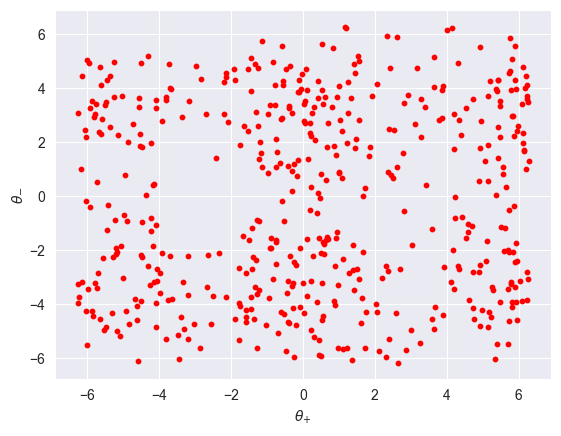

In [30]:
fig,ax = plt.subplots()
i = 1

#cax = ax.imshow(distr,cmap = "viridis", extent = (-2 * np.pi, 2 * np.pi, -2 * np.pi, 2 * np.pi), aspect = "auto")
ax.scatter(all_points[:,0], all_points[:,1], color = "red", s = 10)
#fig.colorbar(cax)
ax.set_xlabel(r"$\theta_{+}$")
ax.set_ylabel(r"$\theta_{-}$")

plt.show()

In [32]:
dim = 40

bp = BerryPhase()

def berry_phase(th1,th2):
    coin_dict = {
        "th1" : th1,
        "th2" : th2,
        "n" : [0,1,0],
        "del" : 2,
        "g" : 0
    }
    model = nonUnitary_QW2(dim,coin_dict)
    return bp.Calculate(model)

th_1 = np.arange(-2*np.pi,2*np.pi,0.1)
th_2 = np.arange(-2*np.pi,2*np.pi,0.1)
th_1, th_2 = np.meshgrid(th_1,th_2)

data_ans = np.vectorize(berry_phase)(th_1,th_2)

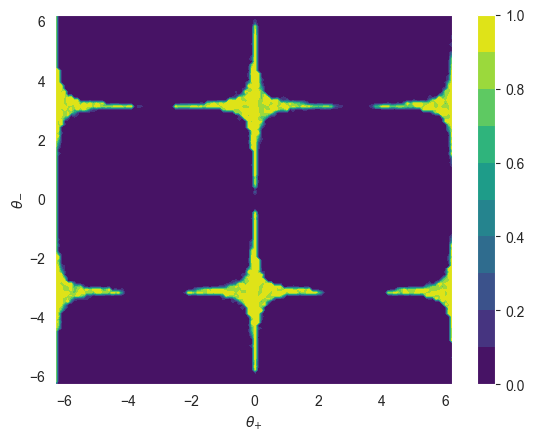

In [33]:
fig,ax = plt.subplots()

cax = ax.contourf(th_1,th_2,data_ans[0]/np.pi,cmap = "viridis", levels = 10)
fig.colorbar(cax)
ax.set_xlabel(r"$\theta_{+}$")
ax.set_ylabel(r"$\theta_{-}$")

plt.show()